# Simulating Continuous models

In [1]:
from epimodels.continuous import models as CM

In [2]:
from IPython.display import Markdown as md
import numpy as np
import matplotlib.pyplot as P

First we instantiate the model type we want to use. The representation of the model is a $\LaTeX$ expression of the model. This can be useful when writing a Document in $\LaTeX$ about your work.

## SIR model

In [3]:
model = CM.SIR()
md(str(model))


# Model: SIR

```mermaid
flowchart LR
         
S(Susceptible) -->|$$\beta$$| I(Infectious)
I -->|$$\gamma$$| R(Removed)

```


Then You can set the initial conditions, time range and parameters for the simulation

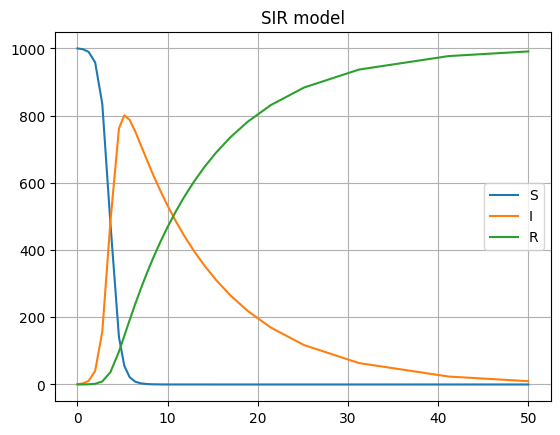

In [4]:
model([1000, 1, 0], [0, 50], 1001, {'beta': 2, 'gamma': .1})
model.plot_traces()

## SEIR model

In [5]:
model = CM.SEIR()
md(str(model))


# Model: SEIR

```mermaid
flowchart LR
         
S(Susceptible) -->|$$\beta$$| E(Exposed)
E -->|$$\epsilon$$| I(Infectious)
I -->|$$\gamma$$| R(Removed)

```


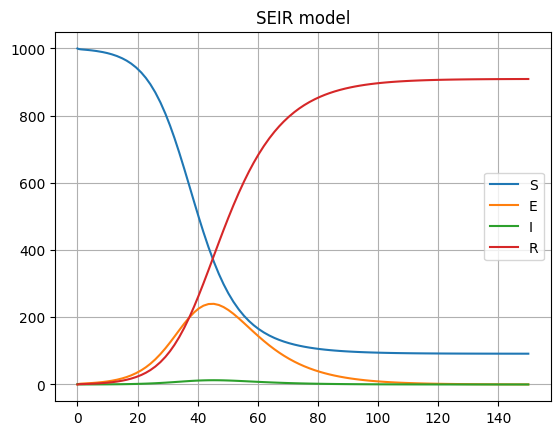

In [6]:
model([1000, 0, 1, 0], [0, 150], 1001, {'beta': 5, 'gamma': 1.9, 'epsilon': 0.1})
model.plot_traces()

## Dengue 4-strain model

In [3]:
model = CM.Dengue4Strain()
md(str(model))


# Model: Dengue4Strain

```mermaid
flowchart LR
    S(Susceptible) -->|$$\beta$$| I1(I 1)
    S -->|$$\beta$$| I2(I 2) 
    S -->|$$\beta$$| I3(I 3)
    S -->|$$\beta$$| I4(I 4)
    
    I1 -->|$$\sigma$$| R1(R 1)
    I2 -->|$$\sigma$$| R2(R 2)
    I3 -->|$$\sigma$$| R3(R 3)
    I4 -->|$$\sigma$$| R4(R 4)
    
    R1 -->|$$\delta$$| I12(I 1+2)
    R1 -->|$$\delta$$| I13(I 1+3)
    R1 -->|$$\delta$$| I14(I 1+4)
    
    R2 -->|$$\delta$$| I21(I 2+1)
    R2 -->|$$\delta$$| I23(I 2+3)
    R2 -->|$$\delta$$| I24(I 2+4)
    
    R3 -->|$$\delta$$| I31(I 3+1)
    R3 -->|$$\delta$$| I32(I 3+2)
    R3 -->|$$\delta$$| I34(I 3+4)
    
    R4 -->|$$\delta$$| I41(I 4+1)
    R4 -->|$$\delta$$| I42(I 4+2)
    R4 -->|$$\delta$$| I43(I 4+3)
    
    I12 -->|$$\sigma$$| R12(R 1+2)
    I13 -->|$$\sigma$$| R13(R 1+3)
    I14 -->|$$\sigma$$| R14(R 1+4)
    
    I21 -->|$$\sigma$$| R12(R 1+2)
    I23 -->|$$\sigma$$| R23(R 2+3)
    I24 -->|$$\sigma$$| R24(R 2+4)
    
    I31 -->|$$\sigma$$| R13(R 1+3)
    I32 -->|$$\sigma$$| R23(R 2+3)
    I34 -->|$$\sigma$$| R34(R 3+4)
    
    I41 -->|$$\sigma$$| R14(R 1+4)
    I42 -->|$$\sigma$$| R24(R 2+4)
    I43 -->|$$\sigma$$| R34(R 3+4)
    
    R12 -->|$$\delta$$| I123(I 1+2+3)
    R13 -->|$$\delta$$| I132(I 1+3+2)
    R14 -->|$$\delta$$| I142(I 1+4+2)
    
    R12 -->|$$\delta$$| I213(I 2+1+3)
    R23 -->|$$\delta$$| I231(I 2+3+1)
    R24 -->|$$\delta$$| I241(I 2+4+1)
     
    R24 -->|$$\delta$$| I243(I 2+4+3)
    R34 -->|$$\delta$$| I341(I 3+4+1)
    R34 -->|$$\delta$$| I342(I 3+4+2)
     
    R23 -->|$$\delta$$| I234(I 2+3+4)
    R14 -->|$$\delta$$| I143(I 1+4+3)
    R13 -->|$$\delta$$| I134(I 1+3+4)
    
    R12 -->|$$\delta$$| I124(I 1+2+4)
    
    I123 -->|$$\sigma$$| R123(R 1+2+3)
    I132 -->|$$\sigma$$| R123(R 1+2+3)
    I124 -->|$$\sigma$$| R124(R 1+2+4)
    
    I142 -->|$$\sigma$$| R124(R 1+2+4)
    I143 -->|$$\sigma$$| R134(R 1+3+4)
    I134 -->|$$\sigma$$| R134(R 1+3+4)
    
    I234 -->|$$\sigma$$| R234(R 2+3+4)
    I243 -->|$$\sigma$$| R234(R 2+3+4)
    I341 -->|$$\sigma$$| R134(R 1+3+4)
    
    I342 -->|$$\sigma$$| R234(R 2+3+4)
    I231 -->|$$\sigma$$| R123(R 1+2+3)
    I241 -->|$$\sigma$$| R124(R 1+2+4)
    
    R123 -->|$$\delta$$| I1234(I 1+2+3+4)
    R124 -->|$$\delta$$| I1243(I 1+2+4+3)
    R134 -->|$$\delta$$| I1342(I 1+3+4+2)
    R234 -->|$$\delta$$| I2341(I 2+3+4+1)
    
    I1234 -->|$$\sigma$$| R1234(R 1+2+3+4)
    I1243 -->|$$\sigma$$| R1234(R 1+2+3+4)
    I1342 -->|$$\sigma$$| R1234(R 1+2+3+4)
    I2341 -->|$$\sigma$$| R1234(R 1+2+3+4)
    
    classDef strain1 fill:#ffcccc,stroke:#ff0000
    classDef strain2 fill:#ccffcc,stroke:#00ff00
    classDef strain3 fill:#ccccff,stroke:#0000ff
    classDef strain4 fill:#ffccff,stroke:#ff00ff
    
    class I1,I21,I31,I41,I231,I241,I341,I2341 strain1
    class I2,I12,I32,I42,I132,I213,I342,I142,I1342 strain2
    class I3,I13,I23,I43,I123,I143,I243,I1243 strain3
    class I4,I14,I24,I34,I142,I124,I134,I342,I124,I134,I234,I1234 strain4;

```


In [6]:
inits = [48000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
pars = {
    'beta': 100 / (50000 * 52),  # 200 novos casos per capita per year
    'N': 50000, #population size
    'delta': 0.79,  # Cross-immunity protection. 1 means no cross-immunity
    'mu': 1 / (1 * 52),  # natural Birth/Mortality rate
    'sigma': 1 / 1.5,  # recovery rate
    'im': [1, 52, 104, 156] #  Week of arrival of cases for each strain
}
model(inits, [0, 208], 50000, pars, max_step=0.1)
# model.plot_traces()
pts = len(model.traces['time'])
Ia1 = np.zeros(pts) # All infectious for strain 1
Ia2 = np.zeros(pts) # All infectious for strain 2
Ia3 = np.zeros(pts) # All infectious for strain 3
Ia4 = np.zeros(pts) # All infectious for strain 4
Iall = np.zeros(pts)
for v,tr in model.traces.items():
    if not v.startswith('I_'):
        continue
    Iall += tr
    if v.endswith('1'):
        Ia1 += tr
    elif v.endswith('2'):
        Ia2 += tr
    elif v.endswith('3'):
        Ia3 += tr
    elif v.endswith('4'):
        Ia4 += tr

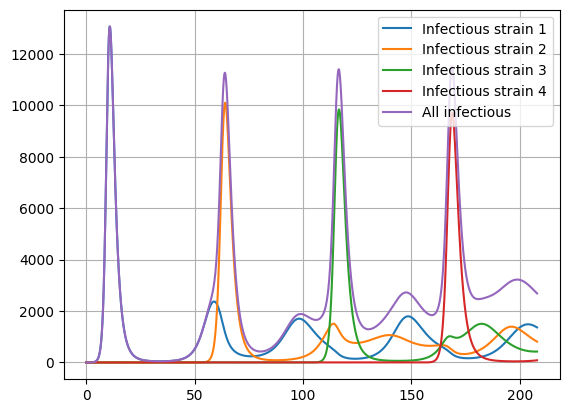

In [7]:
P.plot(model.traces['time'], Ia1, label='Infectious strain 1')
P.plot(model.traces['time'], Ia2, label='Infectious strain 2')
P.plot(model.traces['time'], Ia3, label='Infectious strain 3')
P.plot(model.traces['time'], Ia4, label='Infectious strain 4')
P.plot(model.traces['time'], Iall, label='All infectious')
P.grid()
P.legend(loc=0);